<a href="https://colab.research.google.com/github/abosedealli/LSTM-Multivariate-vs-Univariate/blob/main/Copy_of_ARIMA_HIGH_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random
!pip inatall pandas 
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "inatall" - maybe you meant "install"


In [37]:
x = pd.read_csv("/content/AAPL.dataset.csv")

In [38]:
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date',inplace=True)
x = x[['High','Low','Open','Close', 'Adj Close','Volume']]
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10614 entries, 1980-12-15 to 2023-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10614 non-null  float64
 1   Low        10614 non-null  float64
 2   Open       10614 non-null  float64
 3   Close      10614 non-null  float64
 4   Adj Close  10614 non-null  float64
 5   Volume     10614 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 580.5 KB


In [39]:
data = x.iloc[:int(0.8*len(x))]
print(data.shape)

(8491, 6)


In [40]:
testdata = x.iloc[int(0.8*len(x)):]
print(testdata.shape)

(2123, 6)


In [41]:
data

,High,Low,Open,Close,Adj Close,Volume
Date,,,,,,
1980-12-15,0.122210,0.121652,0.122210,0.121652,0.094663,175884800
1980-12-16,0.113281,0.112723,0.113281,0.112723,0.087715,105728000
1980-12-17,0.116071,0.115513,0.115513,0.115513,0.089886,86441600
1980-12-18,0.119420,0.118862,0.118862,0.118862,0.092492,73449600
1980-12-19,0.126674,0.126116,0.126116,0.126116,0.098137,48630400
...,...,...,...,...,...,...
2014-07-08,23.987499,23.525000,23.732500,23.620001,21.169622,186844000
2014-08-08,23.705000,23.320000,23.565001,23.684999,21.227877,167460000
2014-11-08,24.020000,23.709999,23.817499,23.997499,21.507961,146340000


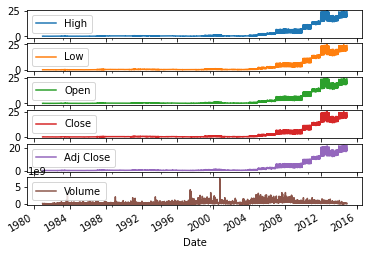

In [42]:
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()

In [43]:
model = pm.auto_arima(data
                      ['Adj Close'], 
                        m=4, seasonal=True,
                      start_p=1, start_q=1, max_order=2, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-15820.902, Time=9.89 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-15762.976, Time=0.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-15791.961, Time=3.58 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-15796.949, Time=4.47 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-15758.914, Time=0.17 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=-15794.966, Time=16.00 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=-15790.019, Time=3.62 sec
 ARIMA(1,1,1)(2,0,1)[4] intercept   : AIC=-15831.561, Time=25.19 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=-15832.108, Time=10.81 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=-15834.117, Time=7.70 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=-15792.003, Time=2.95 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=-15833.562, Time=16.92 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=-15822.888, Time=11.52 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=-15833.409, Time=3.77 sec


In [44]:
model.fit(data['Adj Close'])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 0, 0, 4),
      suppress_warnings=True)

In [45]:
forecast=model.predict(n_periods=len(testdata), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
forecast_df = pd.DataFrame()
forecast_df['Prediction'] = forecast[0]
forecast_df.set_index(testdata.index,inplace=True)

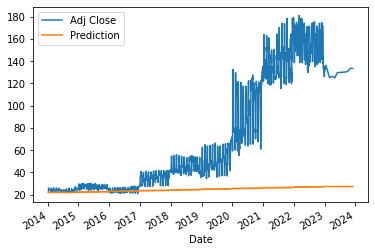

In [47]:
Arima_model = pd.concat([testdata['Adj Close'],forecast_df],axis=1)
Arima_model.replace([np.inf, -np.inf], np.nan, inplace=True)
Arima_model.dropna(inplace=True)
Arima_model.plot()

In [48]:
Arima_model

,Adj Close,Prediction
Date,,
2014-08-14,21.846294,21.808221
2014-08-15,21.953846,21.836280
2014-08-18,22.218248,21.841144
2014-08-19,22.525208,21.861997
2014-08-20,22.534174,21.861655
...,...,...
2023-12-01,133.410004,27.218296
2023-01-13,134.759995,27.220849
2023-01-17,135.940002,27.223402


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(forecast_df['Prediction'] - Arima_model['Adj Close']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean(forecast_df['Prediction'] - Arima_model['Adj Close'])**2)
mape = np.mean(np.abs(forecast_df['Prediction'] - Arima_model['Adj Close']) / Arima_model['Adj Close'])
mse=((np.mean((forecast_df['Prediction'] - Arima_model['Adj Close']))**2))


print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE", mse)
print("MAE:", mae)


RMSE: 45.0378162817036
MAPE: 0.46710470156514855
MSE 2028.4048954244859
MAE: 45.10209933609085
